In [1]:
import torch
from torch_geometric.data import Data
import matplotlib.pyplot as plt
import networkx as nx

# Import SeqEncoder functions
import sys, os
from SeqEncoder import build_vocab, seq_to_graph

d:\Job Projects\GEP-GNN\venv\Lib\site-packages\torch_geometric\__init__.py:4: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: Could not load this library: D:\Job Projects\GEP-GNN\venv\Lib\site-packages\torch_scatter\_version_cpu.pyd
  import torch_geometric.typing
d:\Job Projects\GEP-GNN\venv\Lib\site-packages\torch_geometric\__init__.py:4: UserWarning: An issue occurred while importing 'torch-cluster'. Disabling its usage. Stacktrace: Could not load this library: D:\Job Projects\GEP-GNN\venv\Lib\site-packages\torch_cluster\_version_cpu.pyd
  import torch_geometric.typing
d:\Job Projects\GEP-GNN\venv\Lib\site-packages\torch_geometric\__init__.py:4: UserWarning: An issue occurred while importing 'torch-spline-conv'. Disabling its usage. Stacktrace: Could not load this library: D:\Job Projects\GEP-GNN\venv\Lib\site-packages\torch_spline_conv\_version_cpu.pyd
  import torch_geometric.typing
d:\Job Projects\GEP-GNN\venv\Lib\site-packages\tor

In [2]:
sequence = "ATCGTCGTCGTAAATTCGGTCGTCCC"
k = 3  

In [3]:
vocab = build_vocab([sequence], k)
print("Vocabulary:", vocab)

Vocabulary: {'<UNK>': 0, 'AAA': 1, 'AAT': 2, 'ATC': 3, 'ATT': 4, 'CCC': 5, 'CGG': 6, 'CGT': 7, 'GGT': 8, 'GTA': 9, 'GTC': 10, 'TAA': 11, 'TCC': 12, 'TCG': 13, 'TTC': 14}


In [4]:
graph_data = seq_to_graph(sequence, k, vocab, bidirectional=True)
print(graph_data)

Data(x=[14, 1], edge_index=[2, 32], edge_attr=[32, 1], kmers=[14])



Edge attributes (weights):
tensor([1., 1., 4., 4., 3., 3., 3., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])


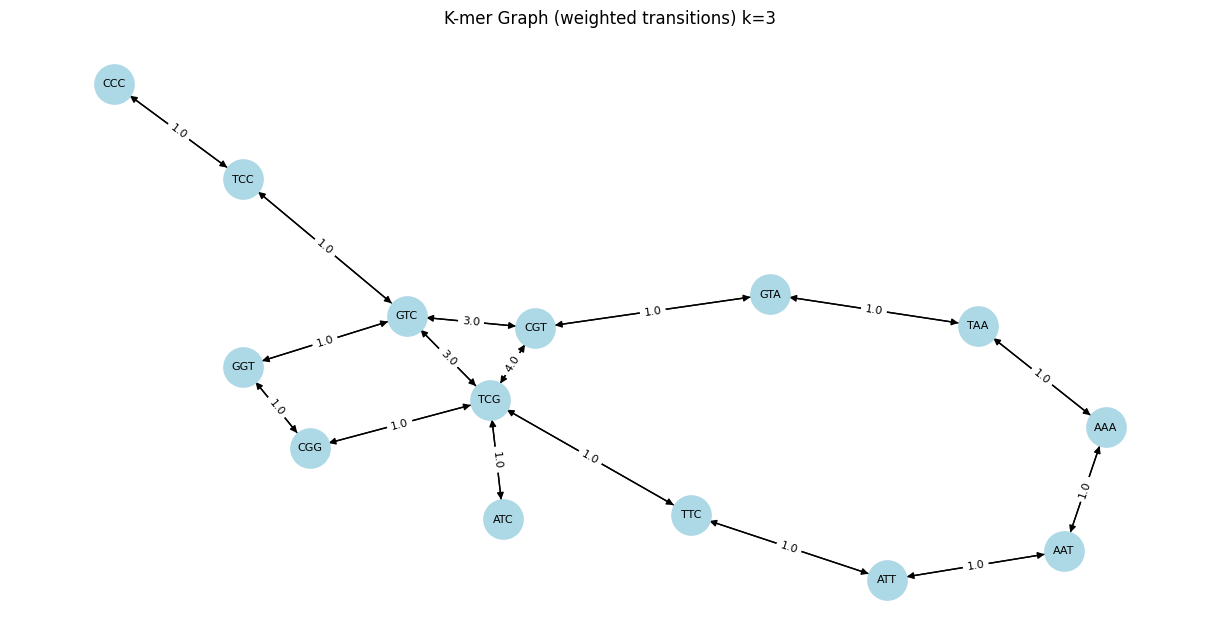

In [5]:
print("\nEdge attributes (weights):")
print(graph_data.edge_attr.squeeze())

# Visualize with weighted edges
plt.figure(figsize=(12, 6))
G = nx.DiGraph()

# Add edges with weights
edges = graph_data.edge_index.t().tolist()
weights = graph_data.edge_attr.squeeze().tolist()

for (u, v), w in zip(edges, weights):
    G.add_edge(u, v, weight=w)

labels = {i: graph_data.kmers[i] for i in range(len(graph_data.kmers))}

pos = nx.spring_layout(G, seed=42)
edge_labels = nx.get_edge_attributes(G, 'weight')

nx.draw(G, pos, with_labels=True, labels=labels, node_color="lightblue",
        node_size=800, font_size=8, arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title(f"K-mer Graph (weighted transitions) k={k}")
plt.show()